<a href="https://colab.research.google.com/github/cernavcii/MyFirstRepo/blob/main/Bitcoin_Fiyatlar%C4%B1n%C4%B1n_Arima_Y%C3%B6ntemi_ile_Analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ARİMA YÖNTEMİ**

In [1]:
pip install yfinance

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from itertools import product
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

In [3]:

btc_data = yf.download('BTC-USD', start='2019-01-11', end='2025-01-11', interval='1d')
btc_data = btc_data[['Close']].dropna()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
btc_data.head()

Price,Close
Ticker,BTC-USD
Date,
2019-01-11,3687.365479
2019-01-12,3661.301025
2019-01-13,3552.953125
2019-01-14,3706.052246
2019-01-15,3630.675293


In [5]:
# Prepare train-test split (97.5% train, 2.5% test)
train_size = int(len(btc_data) * 0.975)
train, test = btc_data[:train_size], btc_data[train_size:]

In [6]:
# Step 2: ARIMA model tuning
p_values = range(0, 4)  # Define the range for ARIMA(p,d,q)
d_values = range(0, 2)
q_values = range(0, 4)

def evaluate_arima_model(train, test, arima_order):
    try:
        model = ARIMA(train, order=arima_order)
        model_fit = model.fit()
        predictions = model_fit.forecast(steps=len(test))
        mse = mean_squared_error(test, predictions)
        return mse, model_fit
    except:
        return float('inf'), None

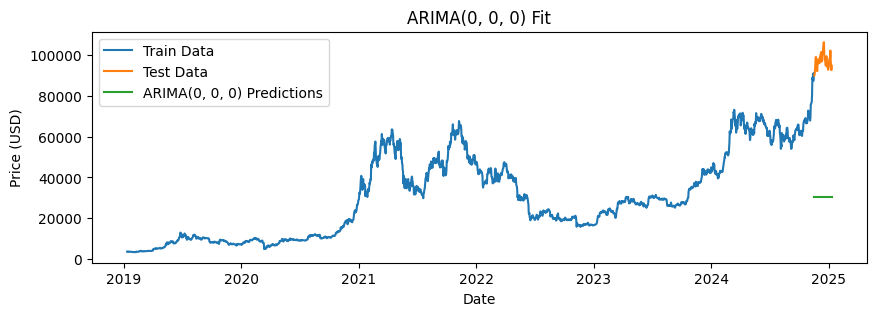

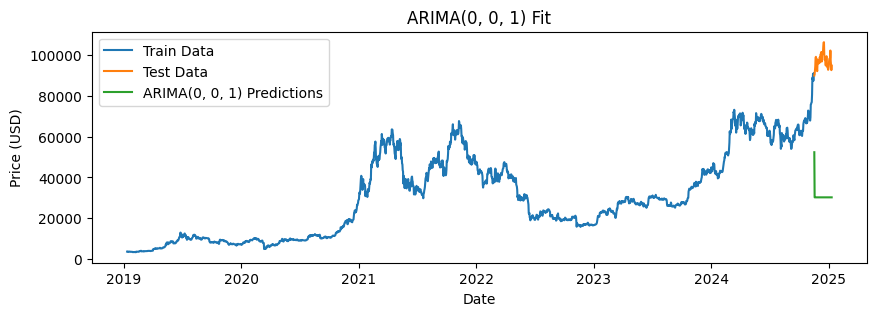

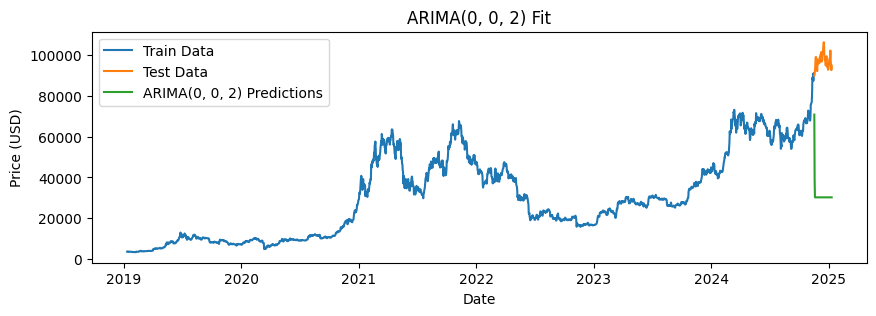

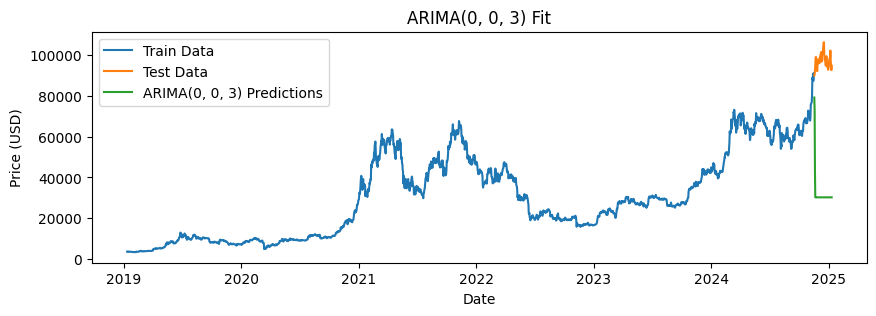

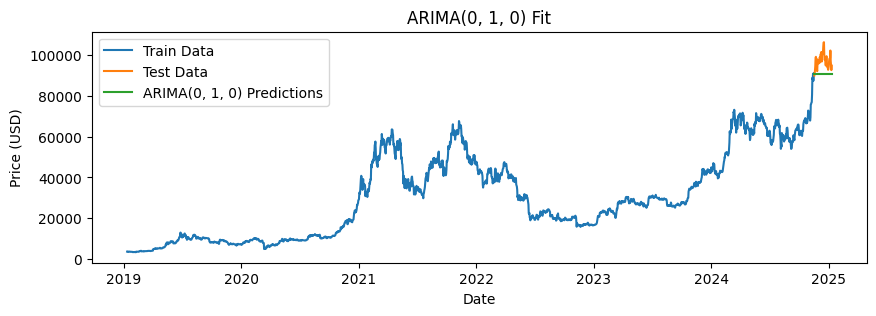

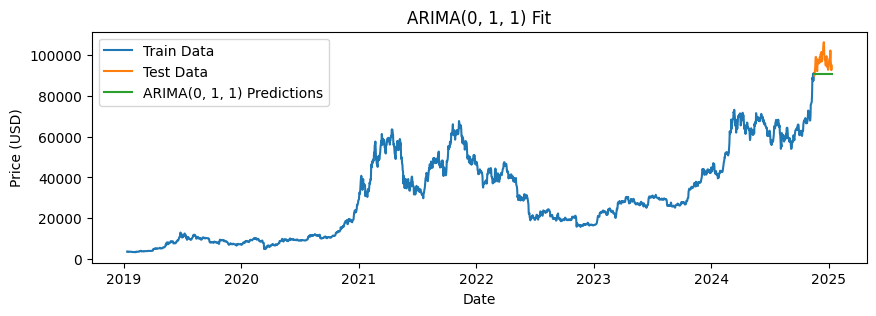

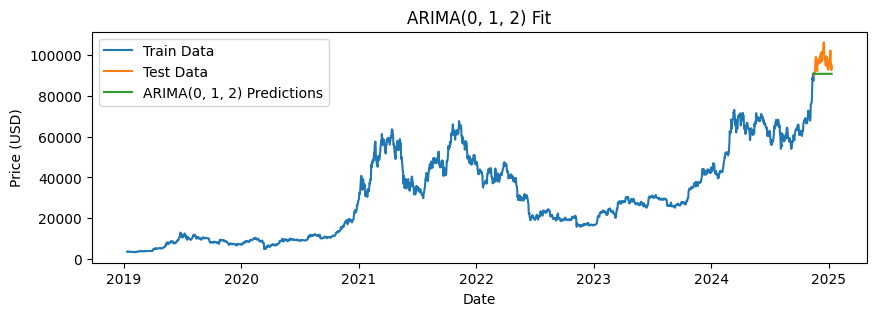

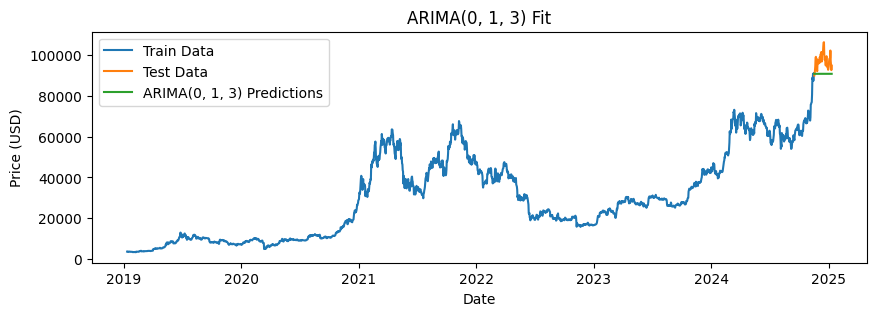

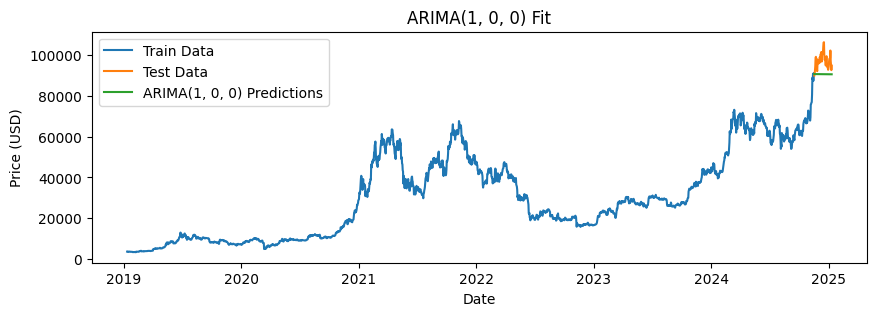

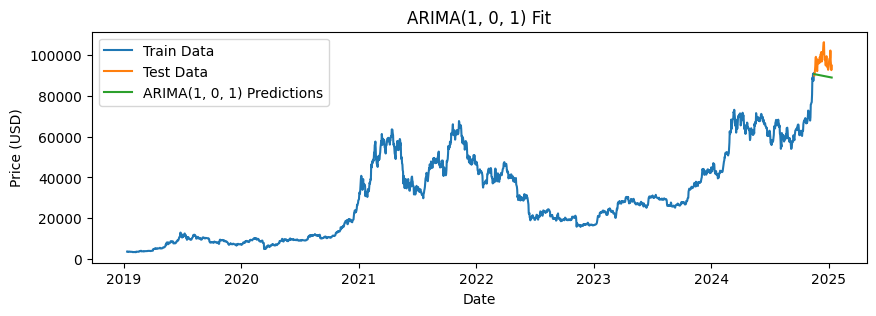

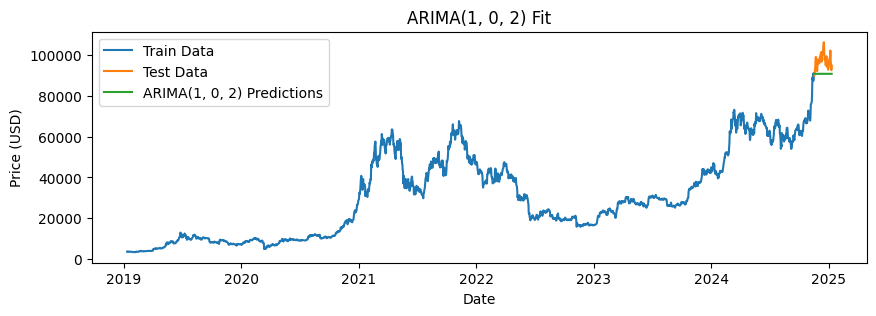

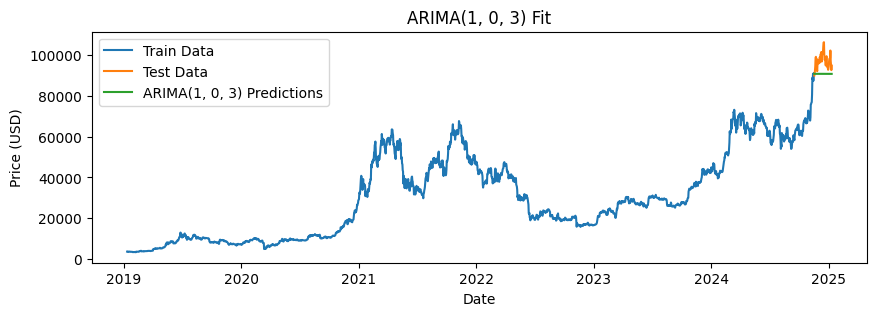

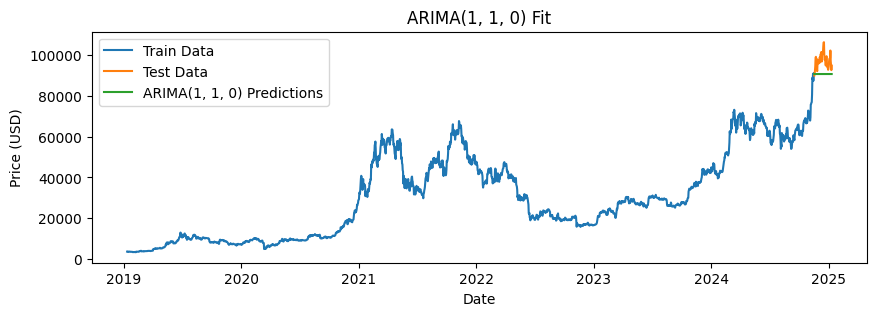

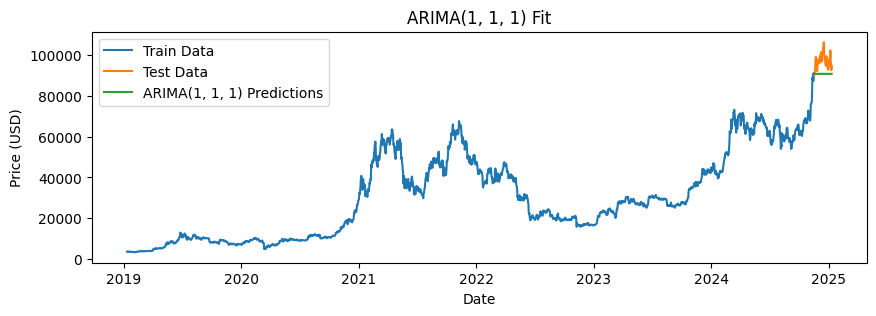

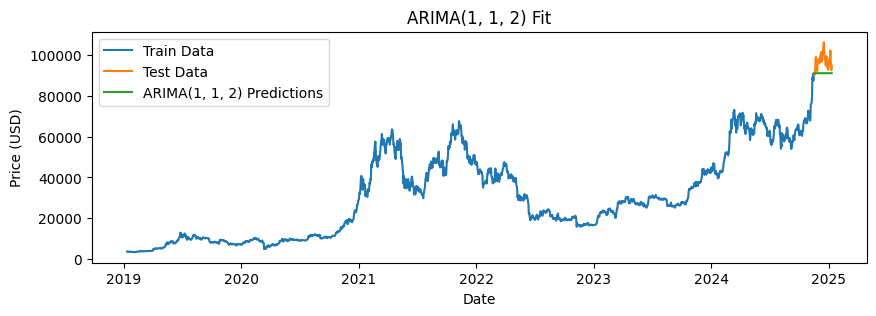

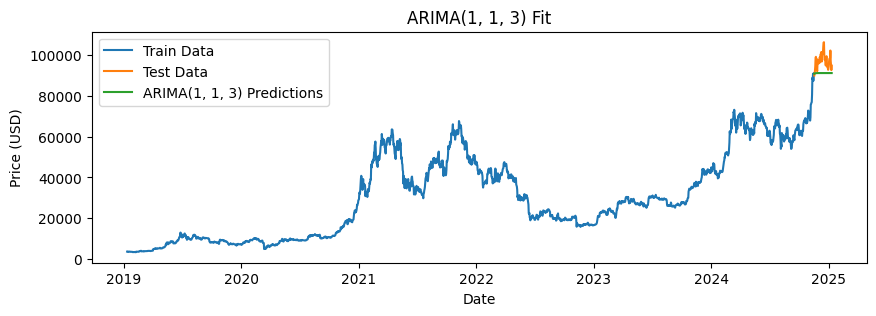

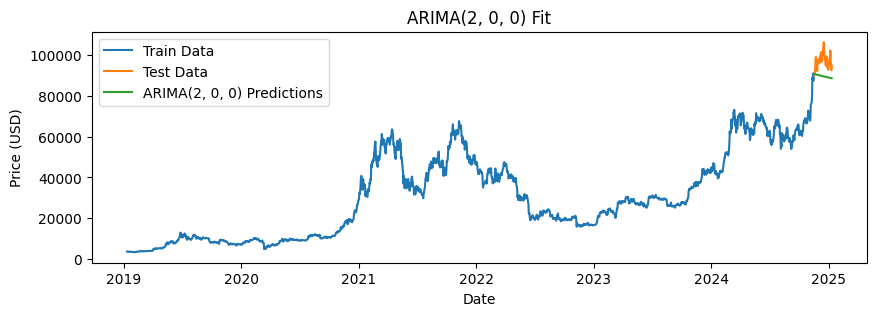

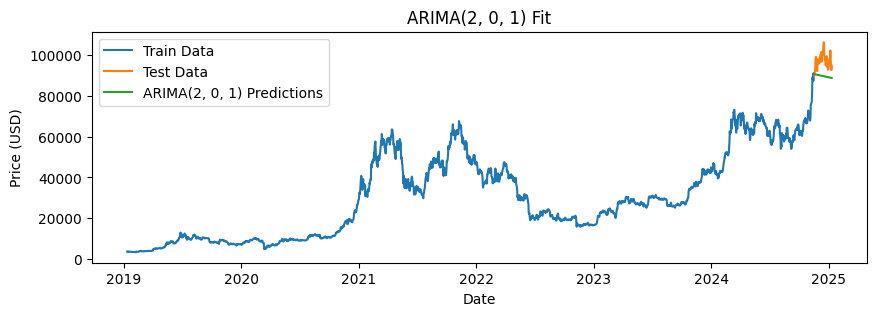

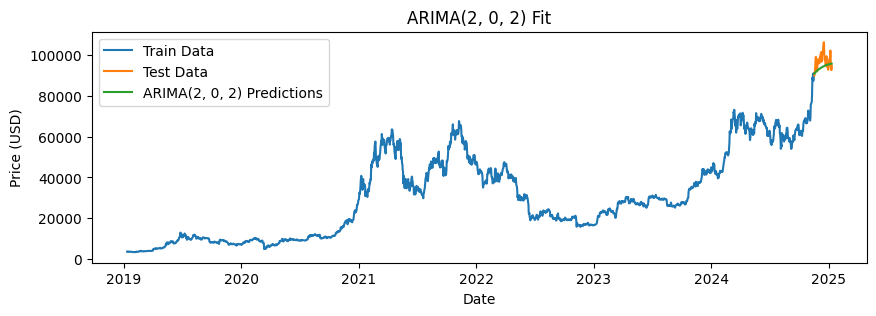

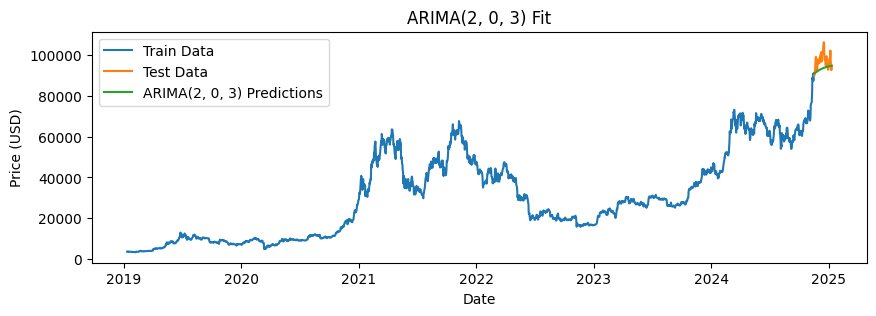

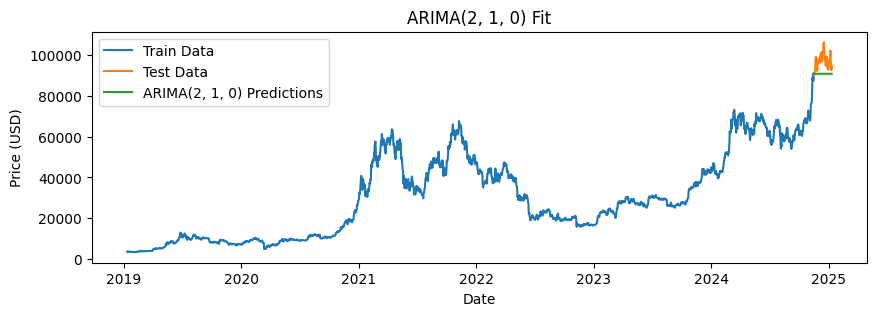

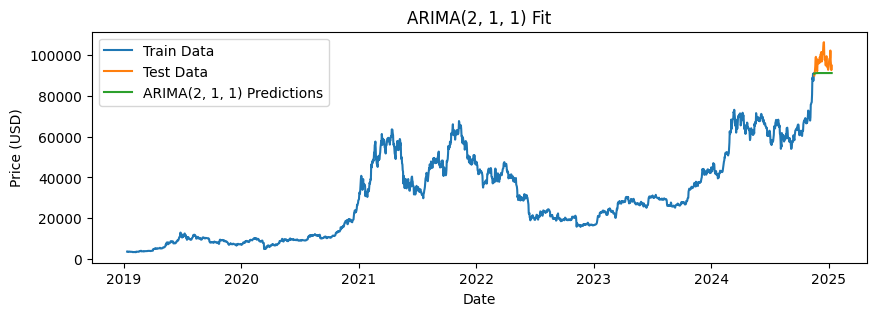

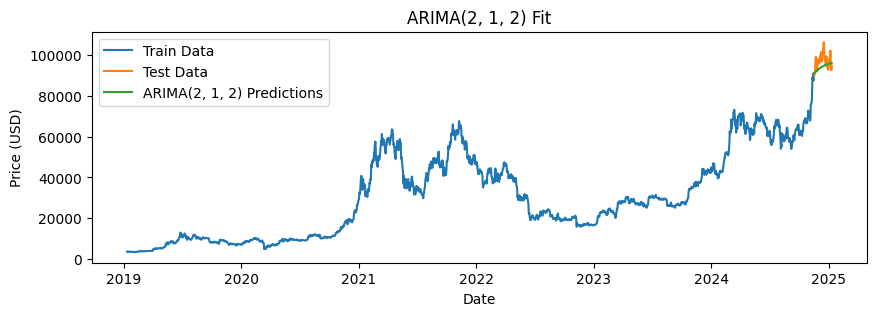

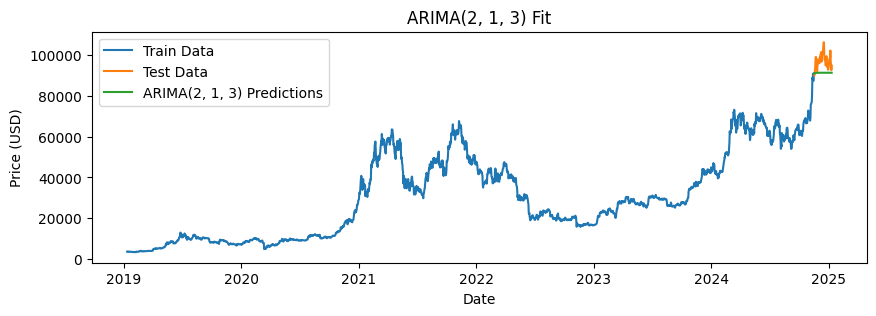

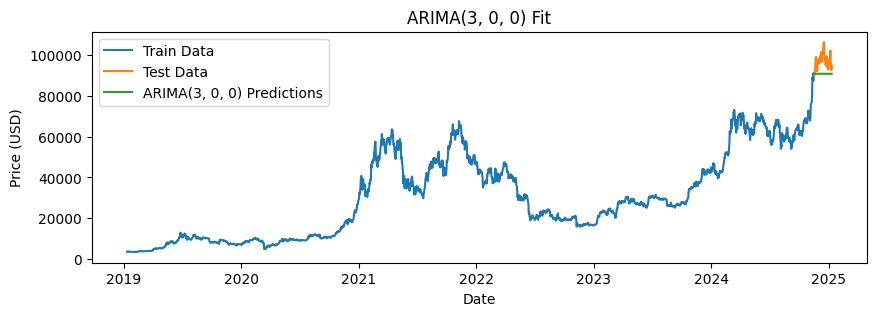

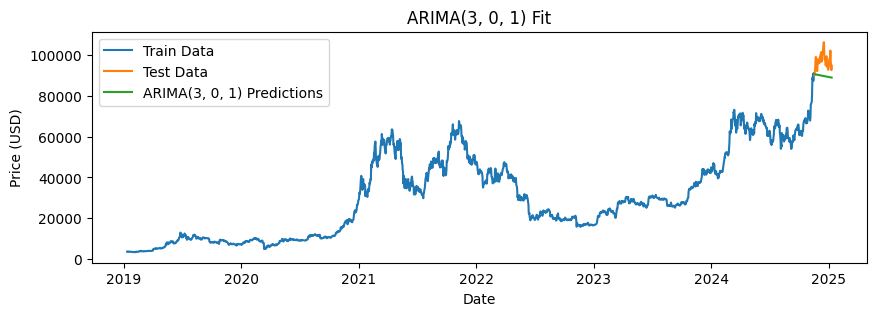

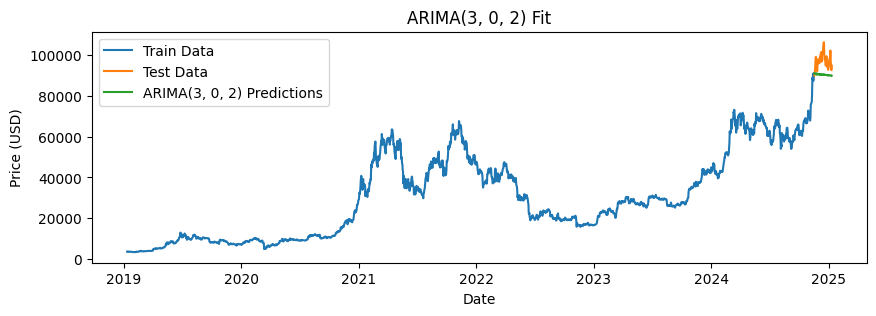

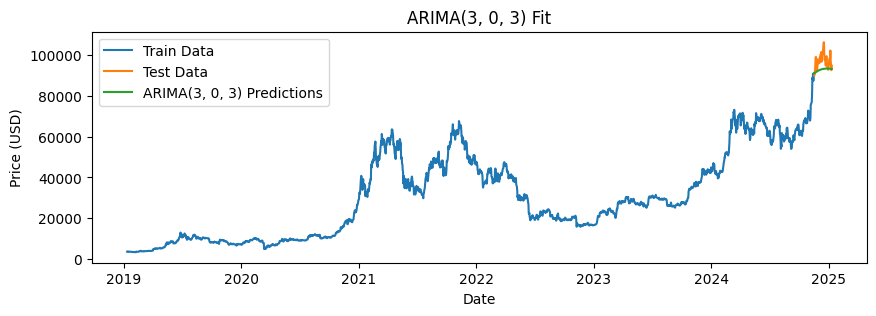

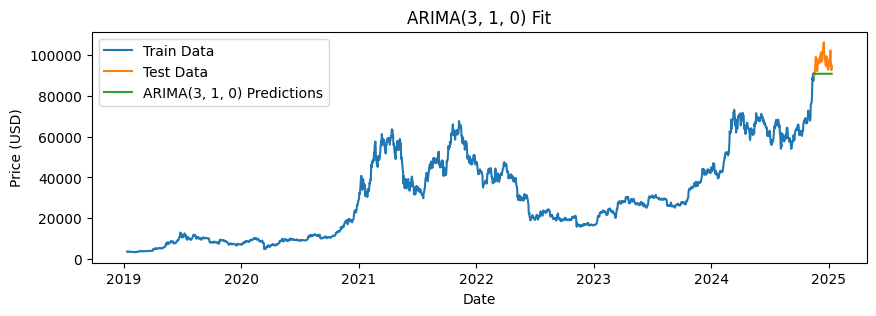

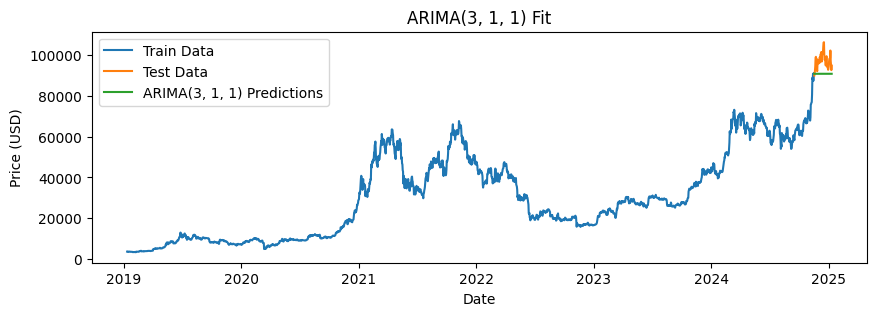

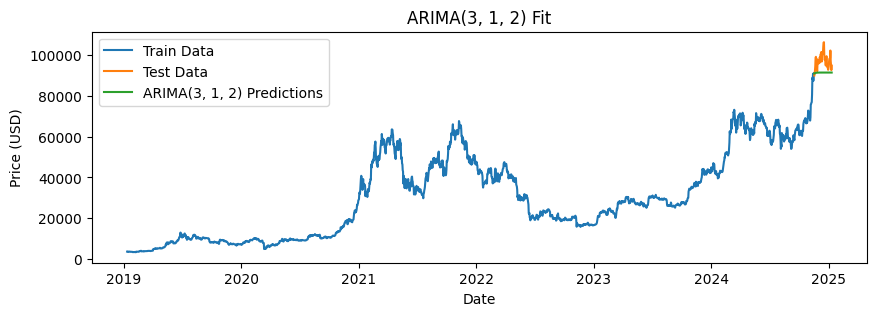

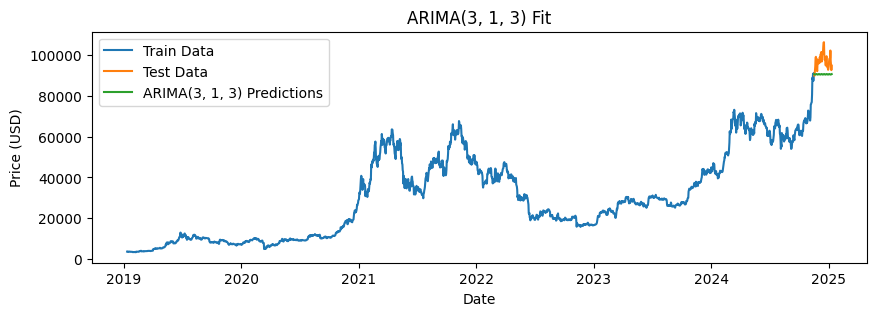

In [7]:
results = []
for p, d, q in product(p_values, d_values, q_values):
    arima_order = (p, d, q)
    mse, model_fit = evaluate_arima_model(train['Close'], test['Close'], arima_order)
    results.append((arima_order, mse, model_fit))

    # Visualize each fit
    if model_fit is not None:
        plt.figure(figsize=(10, 3))
        plt.plot(train.index, train['Close'], label='Train Data')
        plt.plot(test.index, test['Close'], label='Test Data')
        plt.plot(test.index, model_fit.forecast(steps=len(test)), label=f'ARIMA{arima_order} Predictions')
        plt.title(f'ARIMA{arima_order} Fit')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.legend()
        plt.show()

Best ARIMA order: (2, 1, 2), MSE: 21382353.864874877


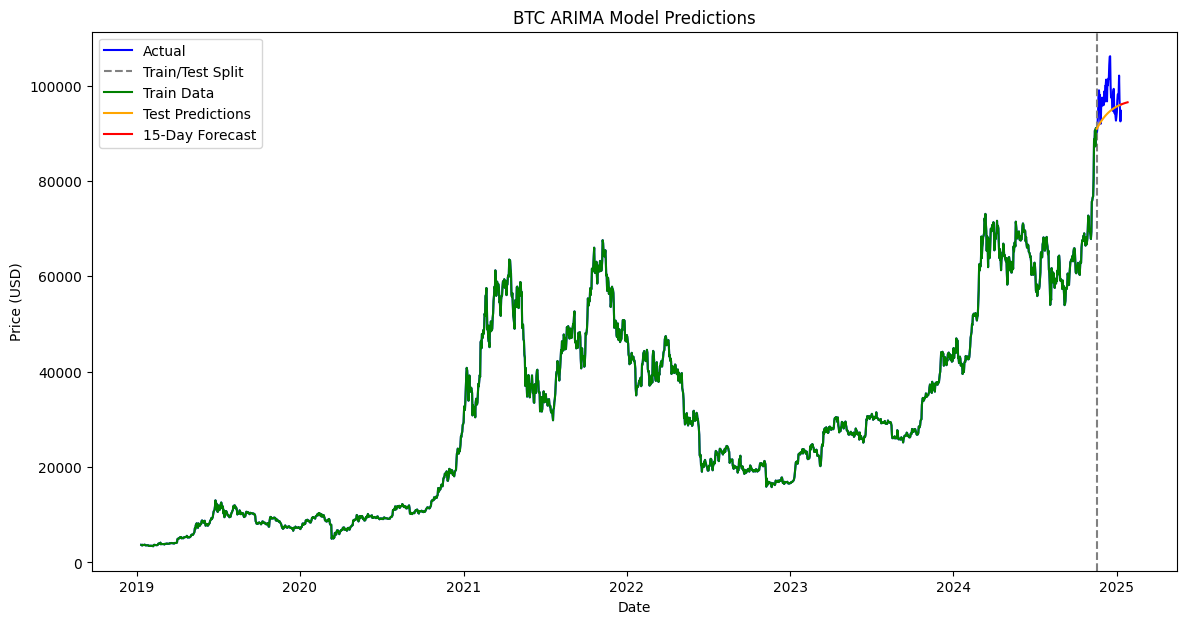

In [8]:
# Select the best model
best_order, best_mse, best_model = min(results, key=lambda x: x[1])
print(f"Best ARIMA order: {best_order}, MSE: {best_mse}")

# Step 3: Predict ahead for 15 days
forecast = best_model.forecast(steps=len(test) + 15)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(btc_data.index, btc_data['Close'], label='Actual', color='blue')
plt.axvline(x=btc_data.index[train_size], color='gray', linestyle='--', label='Train/Test Split')

# Train/Test and Predictions
plt.plot(train.index, train['Close'], label='Train Data', color='green')
plt.plot(test.index, forecast[:len(test)], label='Test Predictions', color='orange')

# Future Predictions
future_index = pd.date_range(start=test.index[-1], periods=16, freq='D')[1:]
plt.plot(future_index, forecast[len(test):], label='15-Day Forecast', color='red')

plt.title('BTC ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

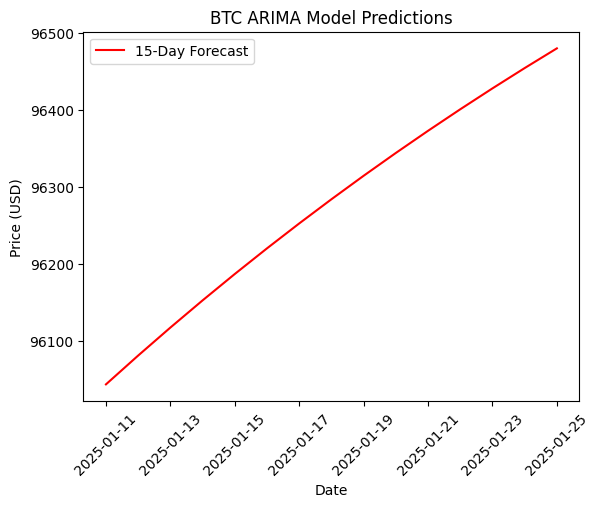

In [9]:
plt.plot(future_index, forecast[len(test):], label='15-Day Forecast', color='red')
plt.title('BTC ARIMA Model Predictions')
plt.xlabel('Date')  # Yazı tipi boyutunu artırmak için fontsize ekleniyor
plt.ylabel('Price (USD)')
plt.xticks(rotation=45, fontsize=10)
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


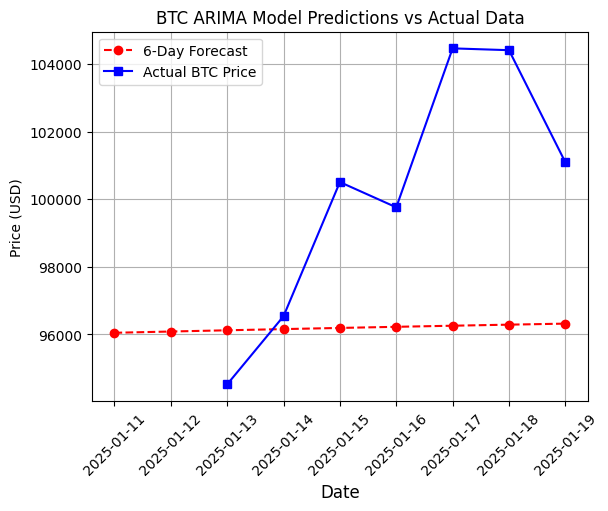

In [10]:
import yfinance as yf
import matplotlib.pyplot as plt


btc_real = yf.download('BTC-USD', start='2025-01-13', end='2025-01-20', interval='1d')
btc_real = btc_real[['Close']].dropna()

real_dates = btc_real.index[-8:]
real_prices = btc_real['Close'].values[-8:]

# Tahminleri çiz
plt.plot(future_index[:9], forecast[len(test):len(test)+9], label='6-Day Forecast', color='red', linestyle='dashed', marker='o')

# Gerçek BTC fiyatlarını ekle
plt.plot(real_dates, real_prices, label='Actual BTC Price', color='blue', linestyle='solid', marker='s')

# Grafik ayarları
plt.title('BTC ARIMA Model Predictions vs Actual Data')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)')
plt.xticks(rotation=45, fontsize=10)
plt.legend()
plt.grid(True)
plt.show()



Modelin Tahmini: ARIMA modeli, 11-19 Ocak 2025 arasında fiyatın sabit kalacağını
tahmin etmiş (~96.000 USD civarında). Ancak, gerçek fiyatlar bu tarihlerde oldukça dalgalı bir
yükseliş trendi gösteriyor (96.000 USD’den 104.000 USD’ye doğru).

In [11]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Gerçek değerler ve tahminler
y_true = test['Close']  # Gerçek değerler
y_pred = forecast[:len(test)]  # Tahminler (test kümesi için)


# R^2 (R-Kare) Skoru
r2 = r2_score(y_true, y_pred)
print(f"R^2 (R-Kare) Skoru: {r2:.4f}")

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# MAE (Mean Absolute Error)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R^2 (R-Kare) Skoru: -0.8170
Root Mean Squared Error (RMSE): 4624.1057
Mean Absolute Error (MAE): 3714.0453


**ARIMA Modeli:**
Tahmin Performansı: ARIMA modeli, daha durağan ve lineer bir tahmin yaklaşımı
sergilemiştir. Ancak gerçek fiyatlardaki yüksek volatiliteyi yakalamada zorlanmıştır.

**Grafik Yorumlaması:** Tahmin edilen değerler ile gerçek değerler arasında belirgin bir fark
olduğu, özellikle fiyatların ani değişim gösterdiği dönemlerde tahminlerin geride kaldığı gözlemlenmiştir. Bu durum, ARIMA'nın volatiliteyi yakalayamama dezavantajını ortaya koymaktadır.

**Zayıf Noktalar:** ARIMA modeli, özellikle trendin dışına çıkan fiyat hareketlerini tahmin etmede yetersiz kalmış ve büyük hatalar oluşturmuştur. Bunun sonucunda metrikler de oldukça düşük bir performansı yansıtmaktadır.